<a href="https://colab.research.google.com/github/jithesh2494/drug-discovery-ml-project/blob/main/drug_discovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import os
import zipfile



Found 'archive.zip'. Extracting CSV file...
Successfully extracted 'drug_discovery_virtual_screening.csv'.

Loading data from 'drug_discovery_virtual_screening.csv'...

--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   compound_id          2000 non-null   object 
 1   protein_id           2000 non-null   object 
 2   molecular_weight     2000 non-null   float64
 3   logp                 1940 non-null   float64
 4   h_bond_donors        2000 non-null   int64  
 5   h_bond_acceptors     2000 non-null   int64  
 6   rotatable_bonds      2000 non-null   int64  
 7   polar_surface_area   1940 non-null   float64
 8   compound_clogp       2000 non-null   float64
 9   protein_length       2000 non-null   int64  
 10  protein_pi           2000 non-null   float64
 11  hydrophobicity       1940 non-null   floa

/tmp/ipython-input-15-2244925044.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


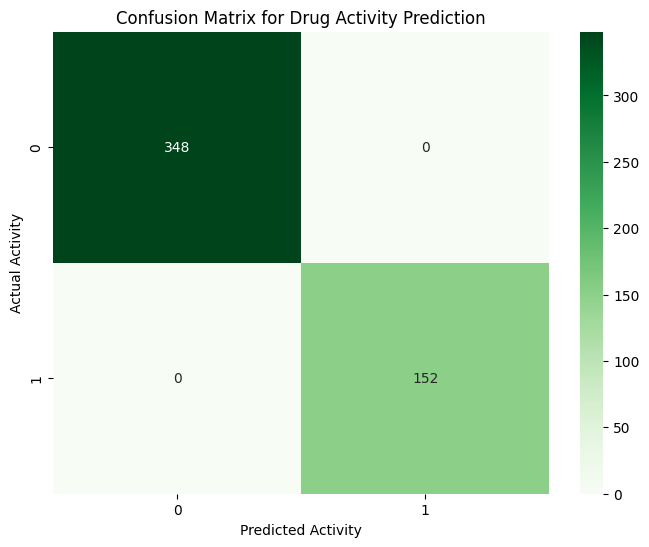

In [15]:
def run_drug_discovery_project():
    """
    This function encapsulates the entire machine learning project pipeline
    for the drug discovery dataset.
    """
    # --- 2. Load and Understand the Data ---

    # IMPORTANT: Change this if your downloaded zip file has a different name
    zip_file_name = 'archive.zip'
    csv_file_name = 'drug_discovery_virtual_screening.csv'

    if not os.path.exists(zip_file_name):
        print(f"Error: The file '{zip_file_name}' was not found.")
        print("Please upload the .zip file you downloaded from Kaggle.")
        print("If your file has a different name, please update the 'zip_file_name' variable in this script.")
        return

    print(f"Found '{zip_file_name}'. Extracting CSV file...")

    # Extract the CSV from the zip file
    try:
        with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
            zip_ref.extract(csv_file_name)
        print(f"Successfully extracted '{csv_file_name}'.")
        file_path = csv_file_name
    except KeyError:
        print(f"Error: Could not find '{csv_file_name}' inside '{zip_file_name}'.")
        print("Please make sure the CSV file inside the zip is named correctly.")
        return
    except Exception as e:
        print(f"An error occurred during extraction: {e}")
        return

    print(f"\nLoading data from '{file_path}'...")
    df = pd.read_csv(file_path)

    print("\n--- Dataset Information ---")
    df.info()

    # --- 3. Data Preprocessing ---
    # This step is crucial for preparing real-world data.

    # a) Check for missing values
    print("\n--- Checking for Missing Values ---")
    print(df.isnull().sum())

    # b) Impute missing values
    for col in ['logp', 'polar_surface_area', 'hydrophobicity']:
        df[col].fillna(df[col].mean(), inplace=True)

    # c) Define Features (X) and Target (y)
    # The 'active' column is our target variable (what we want to predict).
    X = df.drop(['active', 'compound_id', 'protein_id'], axis=1)
    y = df['active']

    print("\n--- First 5 rows of our feature data (X): ---")
    print(X.head())
    print("\n" + "="*50 + "\n")

    # d) Encode the Target Variable
    # Convert 'Active'/'Inactive' labels to 1/0 for the model.
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    target_names = le.classes_

    print("--- Target Variable Transformation ---")
    print(f"Original labels: {y.unique()}")
    print(f"Encoded labels: {pd.Series(y_encoded).unique()}")
    print(f"Label mapping: {list(zip(le.classes_, le.transform(le.classes_)))}")
    print("\n" + "="*50 + "\n")

    # --- 4. Split Data into Training and Testing Sets ---
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=42, stratify=y_encoded)
    # stratify=y_encoded ensures the proportion of active/inactive is the same in train and test sets.

    print(f"Shape of training data (X_train): {X_train.shape}")
    print(f"Shape of testing data (X_test): {X_test.shape}")
    print("\n" + "="*50 + "\n")

    # --- 5. Choose and Train the Model ---
    model = DecisionTreeClassifier(random_state=42)

    print("--- Training the Decision Tree model... ---")
    model.fit(X_train, y_train)
    print("Model training complete!")
    print("\n" + "="*50 + "\n")

    # --- 6. Make Predictions ---
    y_pred = model.predict(X_test)

    # --- 7. Evaluate the Model ---
    accuracy = accuracy_score(y_test, y_pred)
    print(f"--- Model Performance ---")
    print(f"Model Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    print("\n" + "="*50 + "\n")

    print("--- Classification Report: ---")
    print(classification_report(y_test, y_pred, target_names=target_names.astype(str)))
    print("\n" + "="*50 + "\n")

    print("--- Confusion Matrix: ---")
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
                xticklabels=target_names,
                yticklabels=target_names)
    plt.xlabel('Predicted Activity')
    plt.ylabel('Actual Activity')
    plt.title('Confusion Matrix for Drug Activity Prediction')
    plt.show()

# --- Run the Project ---
if __name__ == "__main__":
    run_drug_discovery_project()